In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df_index=pd.read_csv("economic_index.csv")
df_index.head()

,Unnamed: 0,year,month,interest_rate,unemployment_rate,index_price
0,0,2017,12,2.75,5.3,1464
1,1,2017,11,2.50,5.3,1394
2,2,2017,10,2.50,5.3,1357
3,3,2017,9,2.50,5.3,1293
4,4,2017,8,2.50,5.4,1256


In [3]:
# drop unnecessary columns
df_index.drop(columns=["Unnamed: 0","year","month"],axis=1,inplace=True)

In [4]:
df_index.head()

,interest_rate,unemployment_rate,index_price
0,2.75,5.3,1464
1,2.50,5.3,1394
2,2.50,5.3,1357
3,2.50,5.3,1293
4,2.50,5.4,1256


In [5]:
# to check null values
df_index.isnull().sum()

interest_rate        0
unemployment_rate    0
index_price          0
dtype: int64

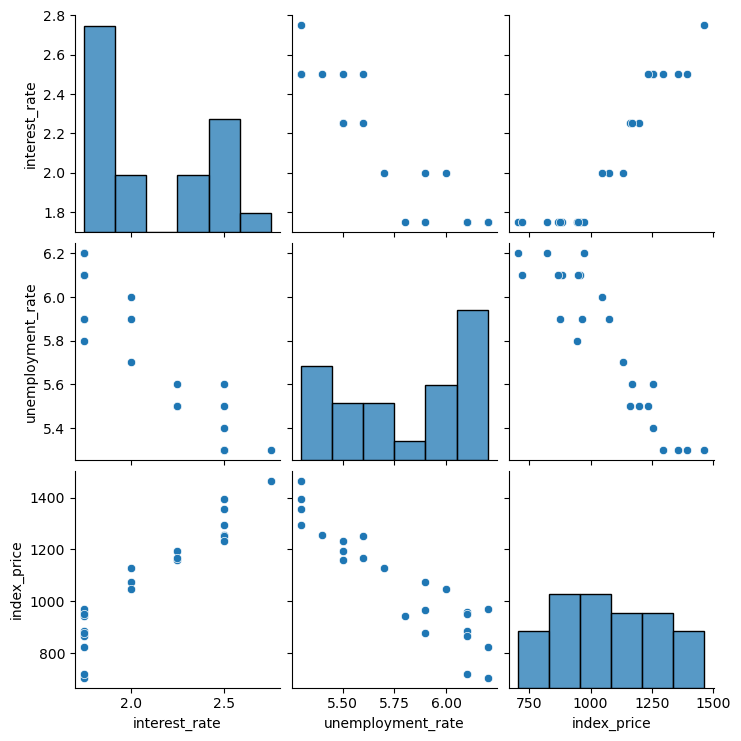

In [6]:
# lets do some visualization
import matplotlib.pyplot as plt
import seaborn as sns
sns.pairplot(df_index)

In [7]:
df_index.corr()

,interest_rate,unemployment_rate,index_price
interest_rate,1.000000,-0.925814,0.935793
unemployment_rate,-0.925814,1.000000,-0.922338
index_price,0.935793,-0.922338,1.000000


Text(0, 0.5, 'unemployment_rate')

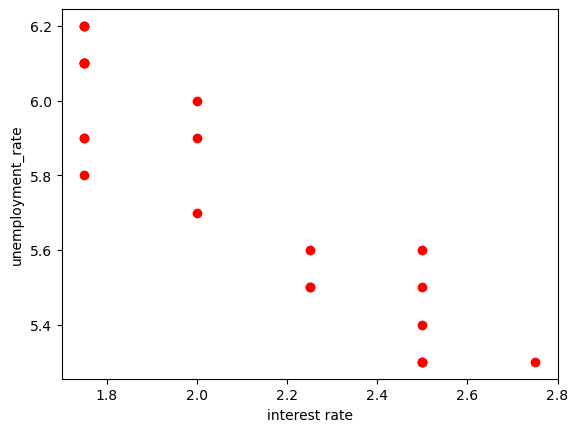

In [8]:
#visualization of datapoints more closely
plt.scatter(df_index["interest_rate"],df_index["unemployment_rate"],color="r")
plt.xlabel("interest rate")
plt.ylabel("unemployment_rate")

In [9]:
# indep and dep features
x=df_index.iloc[:,:-1]   #take all rows ,omit last column
y=df_index.iloc[:,-1]    #take all rows ,take last column
x.head()
# print(x.shape)

,interest_rate,unemployment_rate
0,2.75,5.3
1,2.50,5.3
2,2.50,5.3
3,2.50,5.3
4,2.50,5.4


In [10]:
y.head()
# print(y.shape)

0    1464
1    1394
2    1357
3    1293
4    1256
Name: index_price, dtype: int64

In [11]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.25,random_state=42)

<Axes: xlabel='interest_rate', ylabel='index_price'>

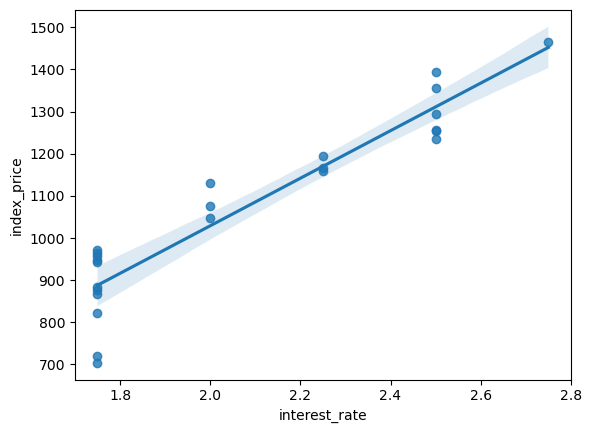

In [12]:
import seaborn as sns
sns.regplot(x=df_index["interest_rate"],y=df_index["index_price"])

<Axes: xlabel='interest_rate', ylabel='unemployment_rate'>

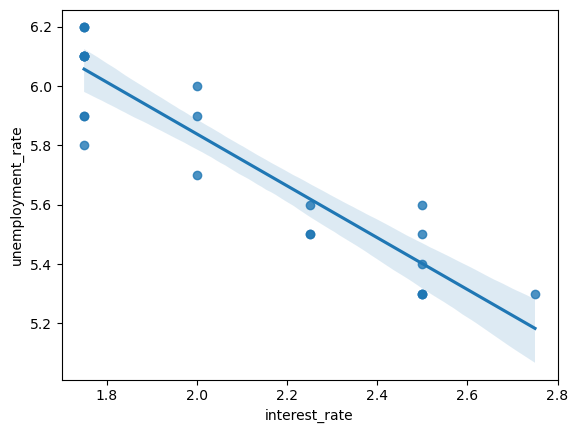

In [13]:
sns.regplot(x=df_index["interest_rate"],y=df_index["unemployment_rate"])

<Axes: xlabel='index_price', ylabel='unemployment_rate'>

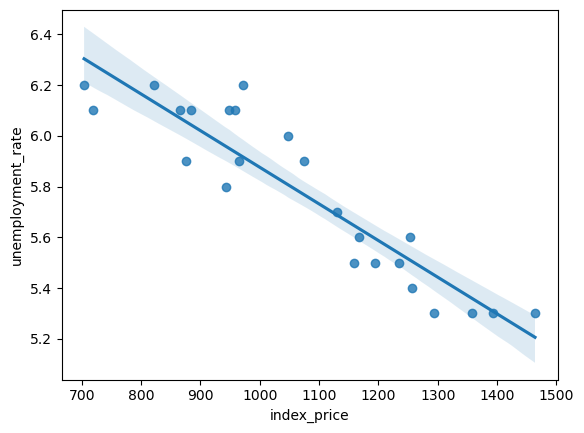

In [14]:
sns.regplot(x=df_index["index_price"],y=df_index["unemployment_rate"])

In [15]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train=scaler.fit_transform(X_train)
X_test=scaler.transform(X_test)
X_train

array([[-0.90115511,  0.37908503],
       [ 1.31077107, -1.48187786],
       [-0.90115511,  1.30956648],
       [ 1.31077107, -0.55139641],
       [ 1.31077107, -1.48187786],
       [-0.16384638,  0.68924552],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -1.48187786],
       [ 1.31077107, -1.17171738],
       [-0.90115511,  1.30956648],
       [-0.90115511,  0.999406  ],
       [-0.90115511,  0.37908503],
       [-0.90115511,  0.999406  ],
       [ 0.57346234, -0.8615569 ],
       [-0.16384638, -0.24123593],
       [-0.90115511,  0.06892455],
       [-0.90115511,  0.999406  ],
       [ 1.31077107, -0.8615569 ]])

In [16]:
from sklearn.linear_model import LinearRegression
regression=LinearRegression()
regression.fit(X_train,y_train)

LinearRegression()

In [17]:
from sklearn.model_selection import cross_val_score
validation_score=cross_val_score(regression,X_train,y_train,scoring='neg_mean_squared_error',cv=3)
validation_score

array([-4921.61331265, -7686.87497294, -5135.9962549 ])

In [18]:
np.mean(validation_score)

-5914.828180162388

In [19]:
# predicitions
y_pred=regression.predict(X_test)
print(y_pred)

[1204.22770398  821.65051903 1406.51300368  857.70889608  994.90992298
 1168.16932693]


In [20]:
from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(y_test,y_pred)
mae=mean_absolute_error(y_test,y_pred)
rmse=np.sqrt(mse)
print(mse)
print(mae)
print(rmse)

5793.762887712579
59.935781523235526
76.11677139574812


In [21]:
from sklearn.metrics import r2_score
score=r2_score(y_test,y_pred)
print(score)

0.8278978091457142


# Assumptions


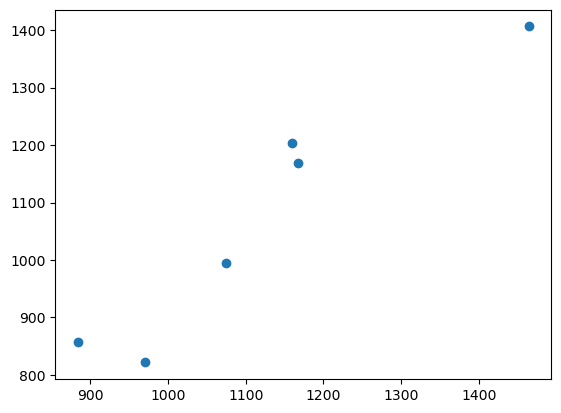

In [22]:
plt.scatter(y_test,y_pred)

In [23]:
residuals=y_test-y_pred
residuals

8     -45.227704
16    149.349481
0      57.486996
18     26.291104
11     80.090077
9      -1.169327
Name: index_price, dtype: float64

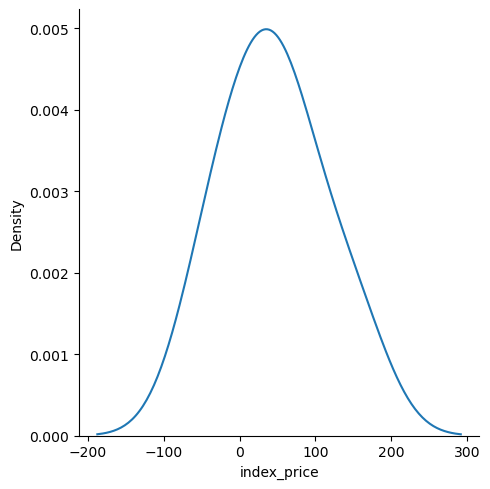

In [24]:
sns.displot(residuals,kind="kde")

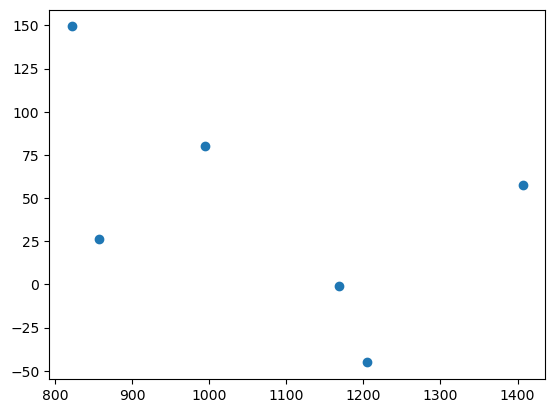

In [25]:
# scatter plot wrt prediction and residuals
# uniform dis means somehow correct
plt.scatter(y_pred,residuals)

In [26]:
import statsmodels.api as sm
model=sm.OLS(y_train,X_train).fit()

In [27]:
model.summary()

c:\Users\user\anaconda3\Lib\site-packages\scipy\stats\_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=18
  res = hypotest_fun_out(*samples, **kwds)


<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:            index_price   R-squared (uncentered):                   0.035
Model:                            OLS   Adj. R-squared (uncentered):             -0.086
Method:                 Least Squares   F-statistic:                             0.2880
Date:                Tue, 14 Jan 2025   Prob (F-statistic):                       0.754
Time:                        12:39:59   Log-Likelihood:                         -150.85
No. Observations:                  18   AIC:                                      305.7
Df Residuals:                      16   BIC:                                      307.5
Df Model:                           2                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            88.2728    658.295      0.134      0.895   -1307.250    1483.796
x2          -116.2572    658.295     -0.177      0.862   -1511.780    1279.266
==============================================================================
Omnibus:                        0.598   Durbin-Watson:                   0.007
Prob(Omnibus):                  0.741   Jarque-Bera (JB):                0.567
Skew:                          -0.361   Prob(JB):                        0.753
Kurtosis:                       2.517   Cond. No.                         4.78
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
print(regression.coef_)

[  88.27275507 -116.25716066]


In [32]:
ip1=12
ip2=13
ipn=[[ip1,ip2]]
print(np.ndim(ipn))

2


In [37]:
# data from user
ip1=float(input("enter ir"))
ip2=float(input("enter ur"))
ipn=[[ip1,ip2]]
ipz=scaler.transform(ipn)

op=regression.predict(ipn)
print(f"index price={op}")

index price=[657.96338062]


c:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


In [77]:
print(X_test.shape)


(6, 2)


In [86]:
new=regression.predict([[2.75,5.3]])
print(new)

[680.03156939]


In [90]:
y_pred=regression.predict(X_train)
y_pred2=regression.predict(X_test)
print(y_train)
print(y_pred)
print(",,dlkskfn")
print(y_test)
print(y_pred2)


13     965
1     1394
21     822
5     1254
2     1357
12    1047
15     958
3     1293
4     1256
22     704
17     949
20     876
23     719
7     1195
10    1130
14     943
19     866
6     1234
Name: index_price, dtype: int64
[ 929.82565018 1341.42873089  821.65051903 1233.25359973 1341.42873089
  958.85154593  857.70889608 1341.42873089 1305.37035383  821.65051903
  857.70889608  929.82565018  857.70889608 1204.22770398 1067.02667708
  965.88402724  857.70889608 1269.31197678]
,,dlkskfn
8     1159
16     971
0     1464
18     884
11    1075
9     1167
Name: index_price, dtype: int64
[1204.22770398  821.65051903 1406.51300368  857.70889608  994.90992298
 1168.16932693]
